# Réseau IceRay

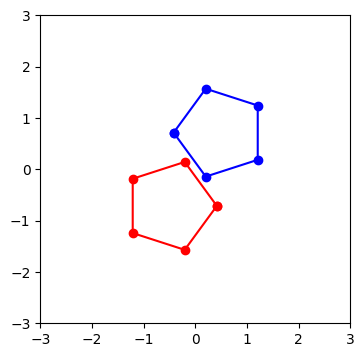

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def PolynomeReg(N,R): #construit un polynôme régulier à N sommets et retourne la liste de ses N sommets concaténé au premier sommet
    Theta=2*np.pi/N*np.arange(0,N+1)
    return(np.array([[R*np.cos(theta),R*np.sin(theta)] for theta in Theta]))

def InverseSommets(polygon): #part du principe qu'on a un nombre impair de sommets donc polygon est de taille paire
    inversedpolygon=-polygon
    return inversedpolygon


def TwoPolygons(N,R,dx,dy):
    polygon1=PolynomeReg(N,R)-np.array([[1/2*dx, dy/2] for i in range(N+1)])
    polygon2=InverseSommets(PolynomeReg(N,R))+np.array([[1/2*dx, dy/2] for i in range(N+1)])
    return [polygon1,polygon2]
    polygon=PolynomeReg(5,1)

plt.rcParams['figure.figsize'] = [4, 4]  

[P1,P2]=TwoPolygons(5,0.9,0.9635,1.4266)
plt.scatter(P1[:,0],P1[:,1],c='red')
plt.plot(P1[:,0],P1[:,1],c='red')
plt.scatter(P2[:,0],P2[:,1],c='blue')
plt.plot(P2[:,0],P2[:,1],c='blue')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

In [2]:
def PolMid(Som):  #prend en entrée la liste des sommets
    N=len(Som)-1
    PosAr=[] #milieu des arêtes
    VecAr=[] #vecteurs directeurs des arêtes
    
    for i in range(1,N+1):
        r=0.5*(Som[i]+Som[i-1])
        e=0.5*(Som[i]-Som[i-1])
        PosAr.append(r)
        VecAr.append(e)
        
    return(np.array(PosAr),np.array(VecAr))

def FormFactor(q,Som):
    N=len(Som)-1
    Pos,Vec=PolMid(Som) #on récupère les sommets, les milieux des arêtes et vecteurs directeurs
    qx,qy=q[0],q[1] #selon les directions x ou y
    c=0 #on suppose ici que c vaut 0 dans la formule de Wuttke
    s=0 #notre somme de termes pour calculer le facteur de forme d'après la formule de Wuttke.
    for i in range(N):
        ex,ey=Vec[i][0],Vec[i][1]
        rx,ry=Pos[i][0],Pos[i][1]
        
        s+=(qx*ey-qy*ex)*(np.sinc((qx*ex+qy*ey)/np.pi)*np.exp(1j*(qx*rx+qy*ry))-c)
        
    return(2*s/(1j*(qx*qx+qy*qy)))

def calcul_I_point(som1,som2,q):
    """som1 : array : tableau contenant les coordonnées des sommets du premier polygone
    som2 : array : tableau contenant les coordonnées des sommets du second polygone
    q : liste : contenant qx et qy du point
    RETOURNE : le calcul de l'intensité en q """
    A1,A2=FormFactor(q,som1),FormFactor(q,som2)
    I=(np.abs(A1+A2))**2
    return I 

def spectre_poly(Som1,Som2,dqx,dqy):
    """Som1,2 : array : tableau contenant les coordonnées des sommets des polygones
     dqx,y : integer : taille sur laquelle on calcule le spectre en x et y
     RETOURNE : le spectre de l'intensité"""
    
    Qx=np.linspace(-dqx,dqx,500)
    Qy=np.linspace(-dqy,dqy,500)

    qqx,qqy=np.meshgrid(Qx,Qy)

    plt.pcolormesh(Qx,Qy,np.log(calcul_I_point(Som1,Som2,[qqx,qqy])),shading='auto')
    plt.colorbar()
    plt.xlabel('qx')
    plt.ylabel('qy')
    plt.title("Représentation du log de l'intensité diffusée")
    plt.show()


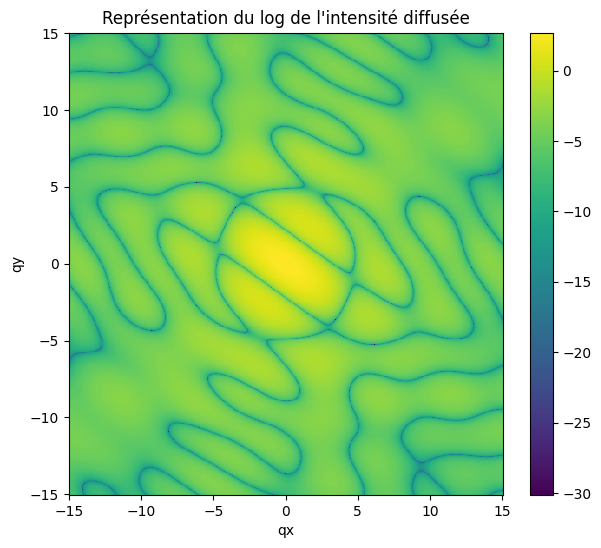

In [5]:
plt.rcParams['figure.figsize'] = [7, 6]  

spectre_poly(P1,P2,15,15)

In [3]:
def Ireseau(qx,qy,Reseau):  #Motif : liste contenant les deux listes de sommets   // Reseau : liste contenant a, b (2 vecteurs) et N le nombre de motifs
    
    a,b,N=Reseau[0],Reseau[1],Reseau[2]
    ax,ay=a[0],a[1]
    bx,by=b[0],b[1]

    Freseau=np.sin((2*N+1)*(qx*ax+qy*ay)*0.5)/np.sin((qx*ax+qy*ay)*0.5)*np.sin((2*N+1)*(qx*bx+qy*by)*0.5)/np.sin((qx*bx+qy*by)*0.5)
    
    return(np.abs(Freseau)**2/(2*N+1)**4)

def sature(I,e):
    nx,ny=np.shape(I)
    II=np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            int=I[i][j]
            if int>e:
                II[i][j]=e
            else:
                II[i][j]=int
    return(II)


### Réseau seul, avec saturation

In [6]:
a=1.809
b=2.8532
N=20
Reseau=[[a,0],[0,b],N]
dqx=8
dqy=8

Qx=np.linspace(-dqx,dqx,400)
Qy=np.linspace(-dqy,dqy,400)

qqx,qqy=np.meshgrid(Qx,Qy)
I=Ireseau(qqx,qqy,Reseau)

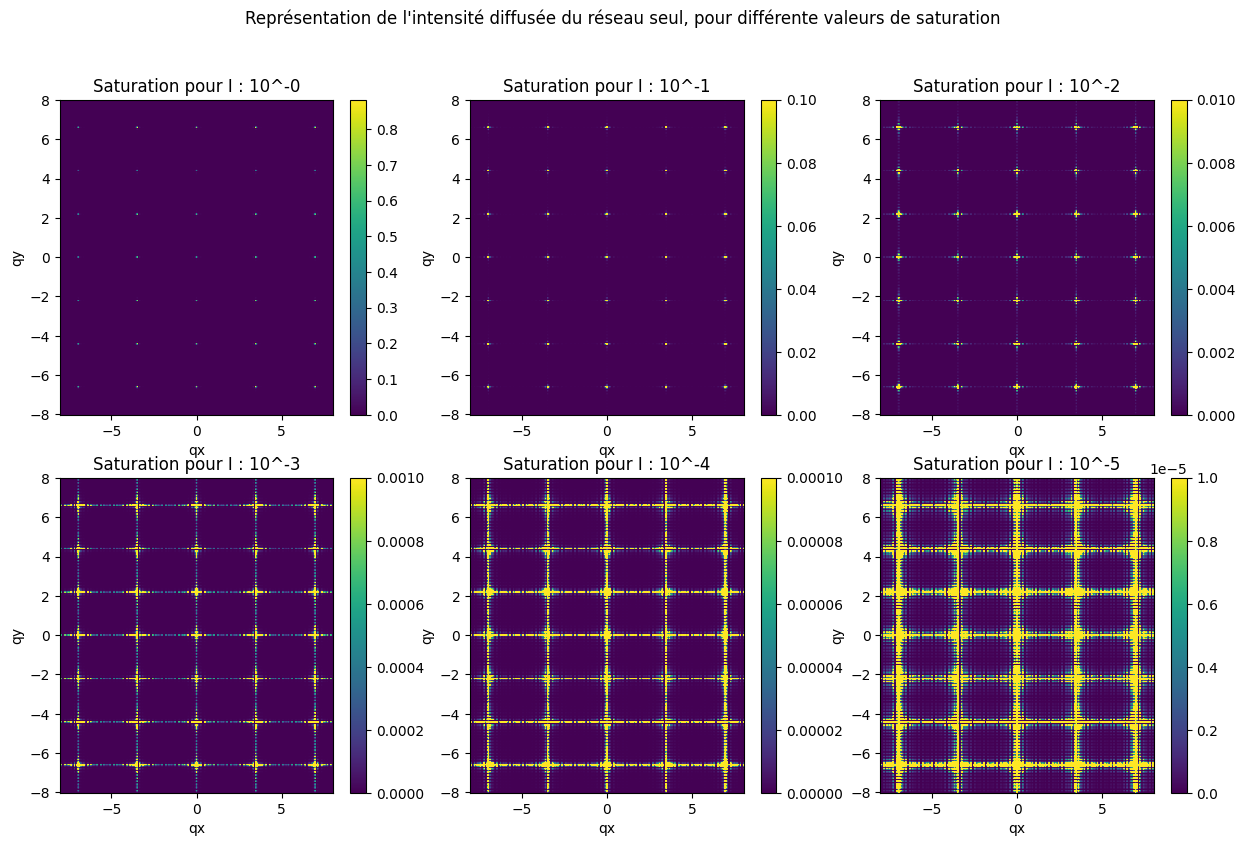

In [7]:
plt.rcParams['figure.figsize'] = [15,9] 
plt.suptitle("Représentation de l'intensité diffusée du réseau seul, pour différente valeurs de saturation")
for i in range(1,7):
    s=i-1
    sat=10**(-s)
    plt.subplot(2,3,i)
    plt.pcolormesh(Qx,Qy,sature(I,sat),shading='auto')
    plt.colorbar()
    plt.xlabel('qx')
    plt.ylabel('qy')
    plt.title('Saturation pour I : 10^-'+str(s))

plt.show()

In [7]:
a=1.809
b=2.8532
N=20
Reseau=[[a,0],[0,b],N]
dqx=8
dqy=8

Qx=np.linspace(-dqx,dqx,7000)
Qy=np.linspace(-dqy,dqy,7000)

qqx,qqy=np.meshgrid(Qx,Qy)
I=Ireseau(qqx,qqy,Reseau)

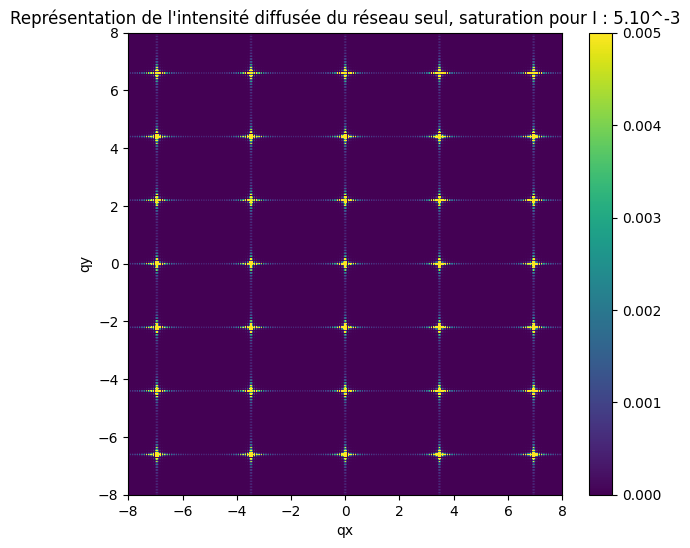

In [8]:
plt.rcParams['figure.figsize'] = [7,6] 

sat=5e-3
plt.pcolormesh(Qx,Qy,sature(I,sat),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée du réseau seul, saturation pour I : 5.10^-3")

plt.show()

## Avec les pentagones:

In [7]:
a=1.809
b=2.8532
Motif=[P1,P2]
N=20
Reseau=[[a,0],[0,b],N]
dqx=8
dqy=8

Qx=np.linspace(-dqx,dqx,400)
Qy=np.linspace(-dqy,dqy,400)

qqx,qqy=np.meshgrid(Qx,Qy)
II=Ireseau(qqx,qqy,Reseau)*calcul_I_point(P1,P2,[qqx,qqy])


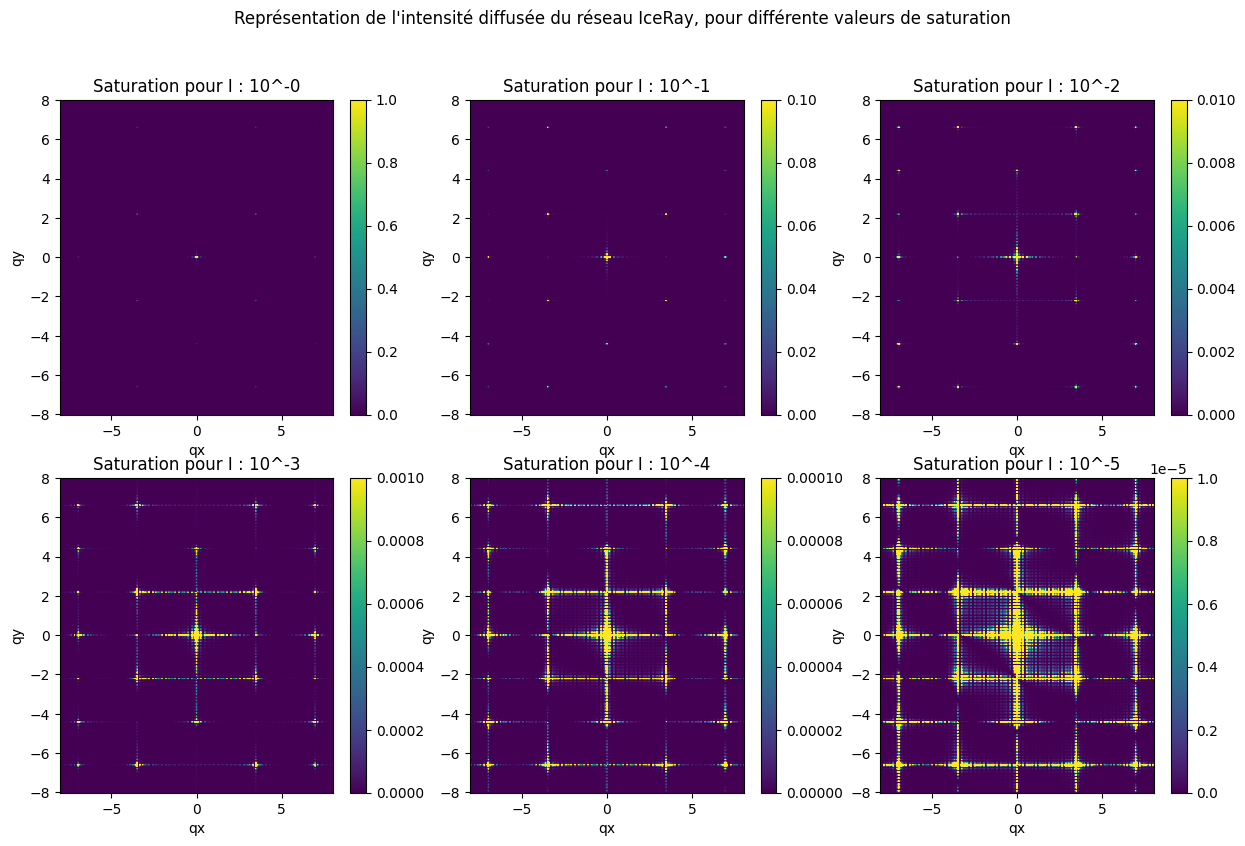

In [8]:
plt.rcParams['figure.figsize'] = [15,9] 
plt.suptitle("Représentation de l'intensité diffusée du réseau IceRay, pour différente valeurs de saturation")
for i in range(1,7):
    s=i-1
    sat=10**(-s)
    plt.subplot(2,3,i)
    plt.pcolormesh(Qx,Qy,sature(II,sat),shading='auto')
    plt.colorbar()
    plt.xlabel('qx')
    plt.ylabel('qy')
    plt.title('Saturation pour I : 10^-'+str(s))

plt.show()

In [9]:
a=1.809
b=2.8532
Motif=[P1,P2]
N=20
Reseau=[[a,0],[0,b],N]
dqx=8
dqy=8

Qx=np.linspace(-dqx,dqx,7000)
Qy=np.linspace(-dqy,dqy,7000)

qqx,qqy=np.meshgrid(Qx,Qy)
II=Ireseau(qqx,qqy,Reseau)*calcul_I_point(P1,P2,[qqx,qqy])

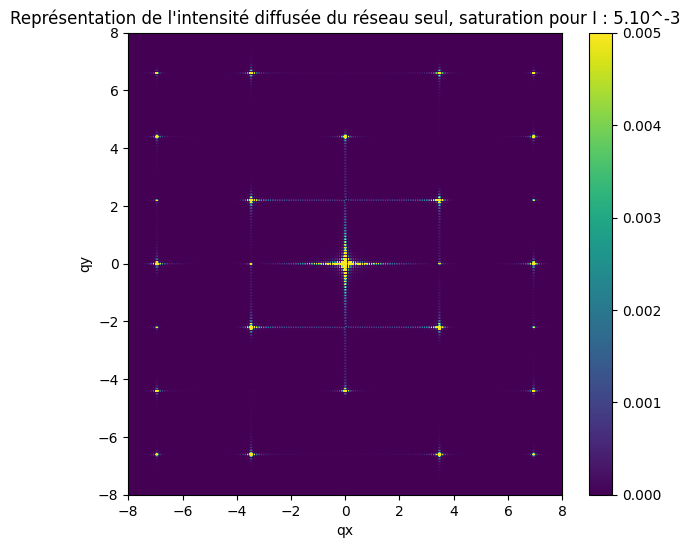

In [10]:
plt.rcParams['figure.figsize'] = [7,6] 

sat=5e-3
plt.pcolormesh(Qx,Qy,sature(II,sat),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée du réseau seul, saturation pour I : 5.10^-3")

plt.show()

In [25]:
def translation(P,dx,dy):
    n=len(P)
    return(P+[[dx,dy] for i in range(n)])
    

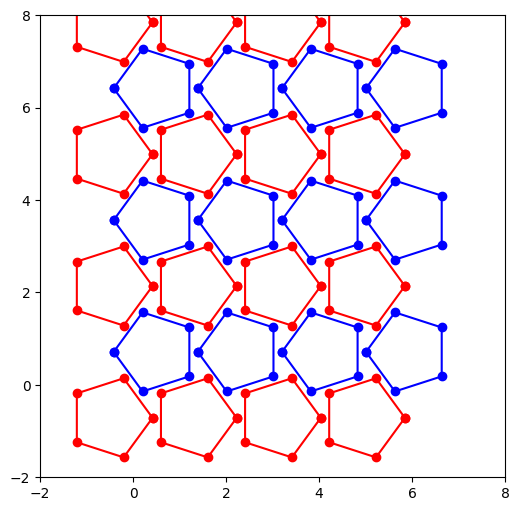

In [26]:
plt.rcParams['figure.figsize'] = [6,6]  

N=4
a=1.809
b=2.8532
Pres1=[]
Pres2=[]
for j in range(N):
    for i in range(N):
        Pt1=translation(P1,i*a,j*b)
        plt.scatter(Pt1[:,0],Pt1[:,1],c='red')
        plt.plot(Pt1[:,0],Pt1[:,1],c='red')
        Pt2=translation(P2,i*a,j*b)
        plt.scatter(Pt2[:,0],Pt2[:,1],c='blue')
        plt.plot(Pt2[:,0],Pt2[:,1],c='blue')

plt.xlim([-2,8])
plt.ylim([-2,8])
    


plt.show()



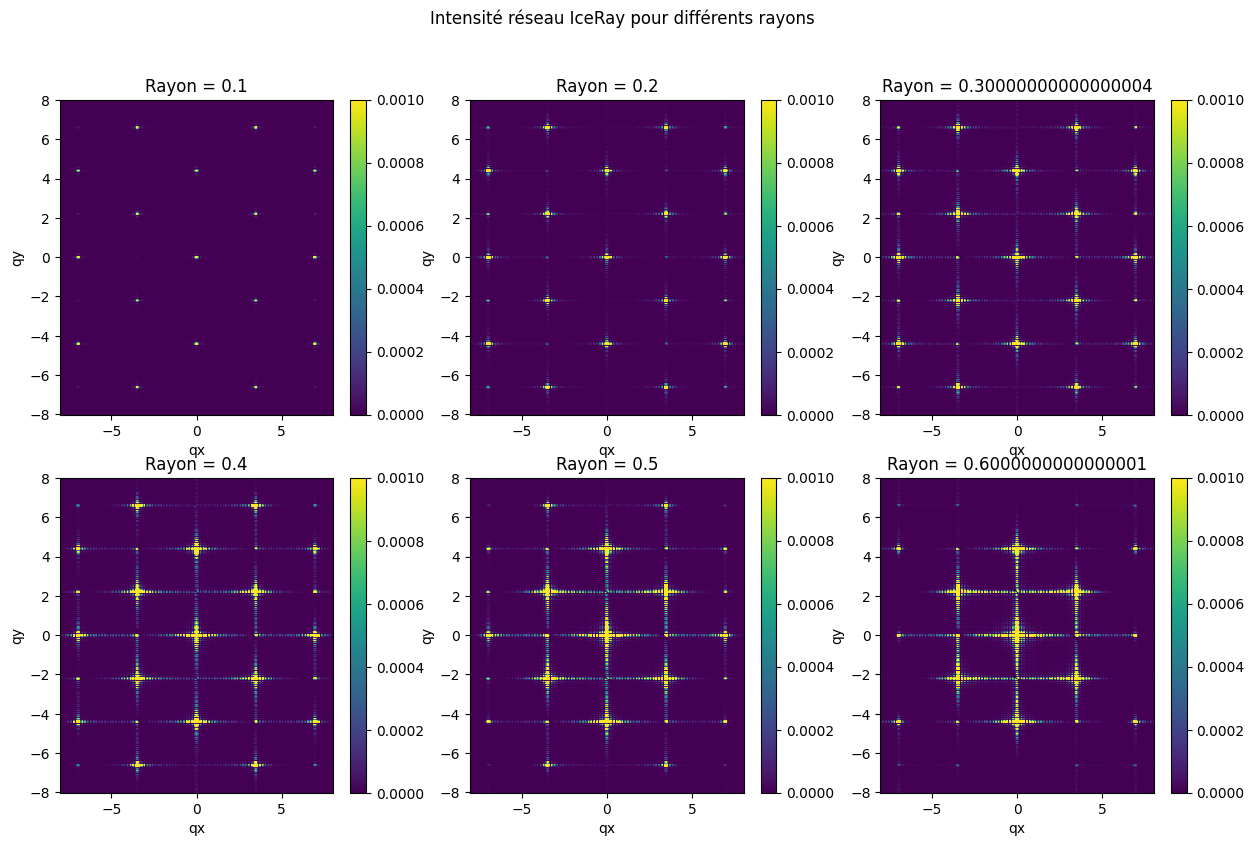

In [14]:
R=1
b=2.8532
a=1.809
N=10
Reseau=[[a,0],[0,b],N]
dqx=8
dqy=8

Qx=np.linspace(-dqx,dqx,400)
Qy=np.linspace(-dqy,dqy,400)
qqx,qqy=np.meshgrid(Qx,Qy)

I=Ireseau(qqx,qqy,Reseau)
plt.rcParams['figure.figsize'] = [15,9] 
plt.suptitle("Intensité réseau IceRay pour différents rayons")

for i in range(1,7):
    r=R*(i)*0.1
    [P1,P2]=TwoPolygons(5,r,0.9635,1.4266)
    II=I*calcul_I_point(P1,P2,[qqx,qqy])
    plt.subplot(2,3,i)
    sat=1e-3
    plt.pcolormesh(Qx,Qy,sature(II,sat),shading='auto')
    plt.colorbar()
    plt.xlabel('qx')
    plt.ylabel('qy')
    plt.title("Rayon = "+str(r))

plt.show()
    

Rem : les croix sont dues à la fenêtre de la TF (on fait la TF d'une boite, ici un parallelogramme penché)
Le réseau est celui avec les centres des pentagones sur chaque noeud PAS VRAIMENT celui en dessous l'est
J'ai mis vecteur a tel qu'on atteigne le centre du pentagone au milieu mais ça ne donne pas la même valeur de a que dans le réseau rectangulaire (2ax != a ici)

In [8]:
a=1.809
b=2.8532
R=1
N=20
Reseau=[[0.5*a,0.5*b],[0,b],N]
dqx=8
dqy=8

Qx=np.linspace(-dqx,dqx,400)
Qy=np.linspace(-dqy,dqy,400)

qqx,qqy=np.meshgrid(Qx,Qy)
I=Ireseau(qqx,qqy,Reseau)
print([0.5*a,0.5*b])

[0.9045, 1.4266]


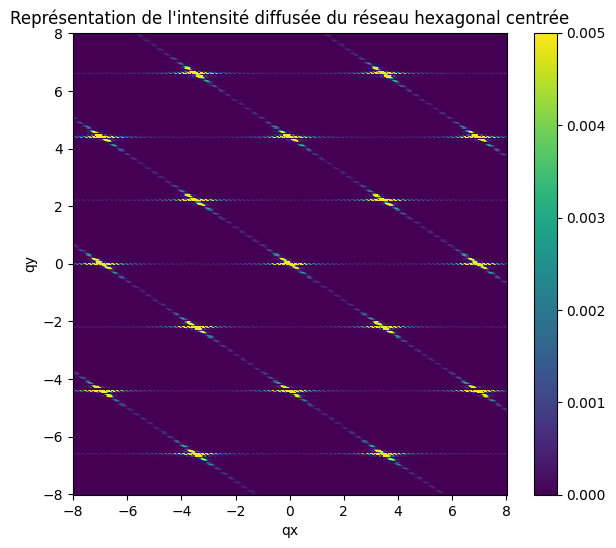

In [9]:
plt.rcParams['figure.figsize'] = [7,6] 

sat=5e-3
plt.pcolormesh(Qx,Qy,sature(I,sat),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée du réseau hexagonal centrée")

plt.show()

Le réseau est à maille rectangulaire centrée

In [4]:
def Imotif(qx,qy,dx,dy):   #motif à 2 objets, séparés par vecteur [dx,dy]
    return(np.abs(1+np.exp(1j*(qx*dx+qy*dy)))**2)

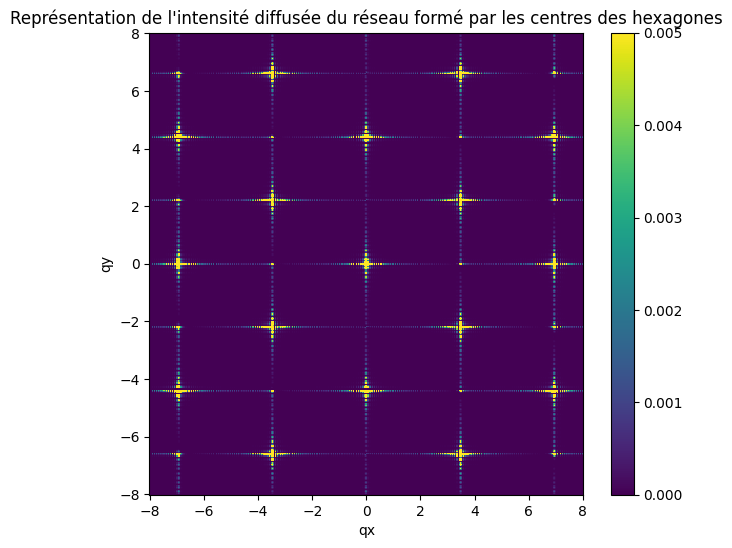

In [6]:
a=1.809
b=2.8532
dx=0.9635
dy=1.4266
R=1
N=20
Reseau=[[a,0],[0,b],N]   
dqx=8
dqy=8

Qx=np.linspace(-dqx,dqx,400)
Qy=np.linspace(-dqy,dqy,400)

qqx,qqy=np.meshgrid(Qx,Qy)
I=Ireseau(qqx,qqy,Reseau)*Imotif(qqx,qqy,dx,dy)
plt.rcParams['figure.figsize'] = [7,6] 

sat=5e-3
plt.pcolormesh(Qx,Qy,sature(I,sat),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée du réseau formé par les centres des hexagones")

plt.show()

Ici le réseau est celui formé par les centres des hexagones: comme cela ne forme pas une maille rectangulaire centrée, il n'y a pas complète extinction des pics au milieu, c'est ce que l'on retrouve en faisant tendre R vers 0 (cf sur la figure avec les différents R, pour R=0.2 par exemple)

# Réseau Dürer

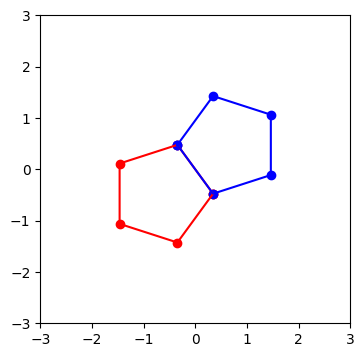

In [171]:

plt.rcParams['figure.figsize'] = [4, 4]  

[P1,P2]=TwoPolygons(5,1,0,0)
dx=P1[1][0]-P2[0][0]
dy=P1[1][1]-P2[0][1]

[P1,P2]=TwoPolygons(5,1,dx,dy)
plt.scatter(P1[:,0],P1[:,1],c='red')
plt.plot(P1[:,0],P1[:,1],c='red')
plt.scatter(P2[:,0],P2[:,1],c='blue')
plt.plot(P2[:,0],P2[:,1],c='blue')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

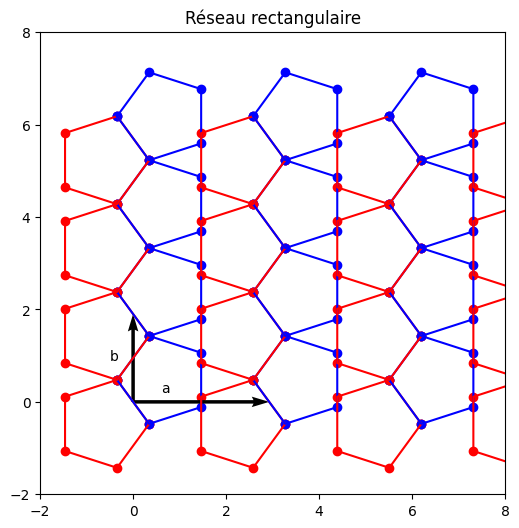

In [172]:
plt.rcParams['figure.figsize'] = [6,6]  
R=1
N=4
a=dx+2*R*np.cos(np.pi/5)
b=2*dy
l=0.5*dy+R*np.sin(np.pi/5)
Pres1=[]
Pres2=[]
for j in range(N):
    for i in range(N):
        Pt1=translation(P1,i*a,j*b)
        plt.scatter(Pt1[:,0],Pt1[:,1],c='red')
        plt.plot(Pt1[:,0],Pt1[:,1],c='red')
        Pt2=translation(P2,i*a,j*b)
        plt.scatter(Pt2[:,0],Pt2[:,1],c='blue')
        plt.plot(Pt2[:,0],Pt2[:,1],c='blue')

plt.xlim([-2,8])
plt.ylim([-2,8])
plt.quiver(0,0,a,0,angles='xy', scale_units='xy', scale=1)
plt.quiver(0,0,0,b,angles='xy', scale_units='xy', scale=1)
plt.text(0.6,0.2,'a')
plt.text(-0.5,0.9,'b')
plt.title('Réseau rectangulaire')


plt.show()



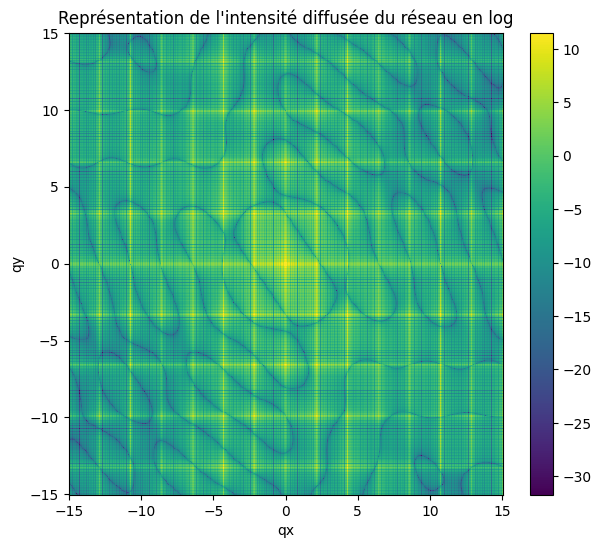

In [173]:
plt.rcParams['figure.figsize'] = [7,6]  
a=dx+2*R*np.cos(np.pi/5)
b=2*dy
Motif=[P1,P2]
N=100
Reseau=[[a,0],[0,b],N]
dqx=15
dqy=15

Qx=np.linspace(-dqx,dqx,500)
Qy=np.linspace(-dqy,dqy,500)

qqx,qqy=np.meshgrid(Qx,Qy)
I=sature(Ireseau(qqx,qqy,Reseau)*calcul_I_point(P1,P2,[qqx,qqy]),1e5)

plt.pcolormesh(Qx,Qy,np.log(I),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée du réseau en log")
plt.show()

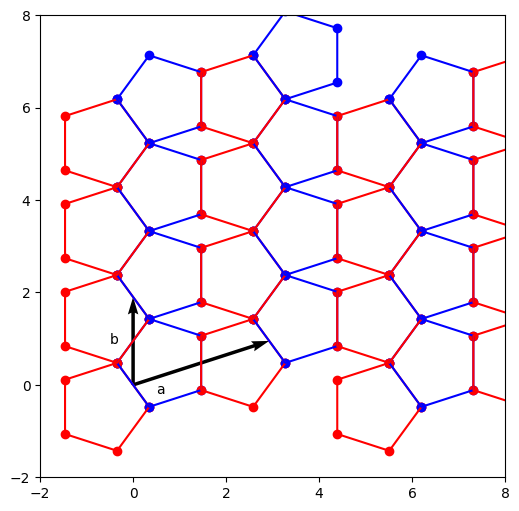

In [174]:
plt.rcParams['figure.figsize'] = [6,6]  
R=1
N=4
a=dx+2*R*np.cos(np.pi/5)
b=2*dy
l=dy
Pres1=[]
Pres2=[]
for j in range(N):
    for i in range(N):
        Pt1=translation(P1,i*a,j*b+(i%2)*l)
        plt.scatter(Pt1[:,0],Pt1[:,1],c='red')
        plt.plot(Pt1[:,0],Pt1[:,1],c='red')
        Pt2=translation(P2,i*a,j*b+(i%2)*l)
        plt.scatter(Pt2[:,0],Pt2[:,1],c='blue')
        plt.plot(Pt2[:,0],Pt2[:,1],c='blue')

plt.xlim([-2,8])
plt.ylim([-2,8])
plt.quiver(0,0,a,l,angles='xy', scale_units='xy', scale=1)
plt.quiver(0,0,0,b,angles='xy', scale_units='xy', scale=1)
plt.text(0.5,-0.2,'a')
plt.text(-0.5,0.9,'b')


plt.show()



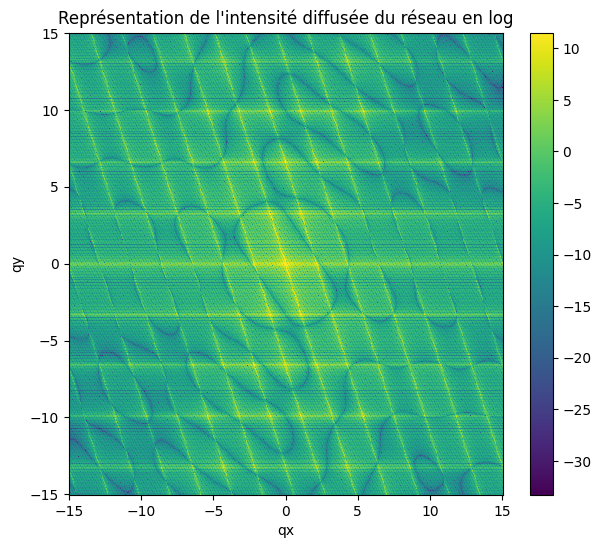

In [176]:
plt.rcParams['figure.figsize'] = [7,6]  
a=dx+2*R*np.cos(np.pi/5)
b=2*dy
Motif=[P1,P2]
N=100
Reseau=[[a,dy],[0,b],N]
dqx=15
dqy=15

Qx=np.linspace(-dqx,dqx,500)
Qy=np.linspace(-dqy,dqy,500)

qqx,qqy=np.meshgrid(Qx,Qy)

I=sature(Ireseau(qqx,qqy,Reseau)*calcul_I_point(P1,P2,[qqx,qqy]),1e5)

plt.pcolormesh(Qx,Qy,np.log(I),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée du réseau en log")
plt.show()